# 3. Working with Data Files in R

In this chapter, we will be working with data in R. To start, we need to load our data into R: this requires identifying the type of data file we have (e.g. .csv, .xlsx, .dta) and finding the appropriate function to load in the data. This will create a data frame object containing the information from the file. After demonstrating how to load in such data, this chapter will show you how to find information about data columns, including finding missing values, summarizing columns, and subsetting the data. Additionally, we look at how to create new columns through some simple transformations.  

In this chapter and all future chapters, we will load in the required libraries at the start of the chapter - for example, in this particular chapter, we need a single library `RforHDSdata` that contains the sample data sets used in this book.

In [1]:
suppressPackageStartupMessages(library(RforHDSdata))

## Importing and Exporting Data

The data we will use in this chapter contains information about patients who visited one of the University of Pittsburgh’s seven pain management clinics. This includes patient-reported pain assessments using the Collaborative Health Outcomes Information Registry (CHOIR) at baseline and at a 3-month follow-up. You can use the help operator `?pain` to learn more about the source of this data and to read its column descriptions. Since this data is available in our R package, we can use the `data` function to load this data into our environment. Note that this data has 21,659 rows and 92 columns.

In [2]:
data(pain)
dim(pain)

[1] 21659    92

In general, the data you will be using will not be available in R packages and will instead exist in one or more data files on your personal computer. In order to load in this data to R, you need to use the function that corresponds to the file type you have. For example, you can load a .csv file using the `read.csv()` function in base R or using the `read_csv()` function from the `readr` package, both of which were shown in [Chapter 1](https://alicepaul.github.io/r-for-health-data-science/book/1_intro_to_r.html). As an example, we load the `fake_names.csv` dataset belwo using both of these functions: looking at the print output below, we can see that there is slight difference in the data structure and data types storing the data between these two functions. The function `read.csv()` loads the data as a data frame, whereas the function `read_csv()` loads the data as a `spec_tbl_df`, a special type of data frame called a **tibble** that is used by the `tidyverse` packages. We will cover this data structure in more detail in [Chapter 5](https://alicepaul.github.io/r-for-health-data-science/book/5_data_transformations_summaries.html). For now, note that you can use either function to read in a .csv file.

In [3]:
read.csv("data/fake_names.csv")

Name,Age,DOB,City,State
<chr>,<int>,<chr>,<chr>,<chr>
Ken Irwin,37,6/28/85,Providence,RI
Delores Whittington,56,4/28/67,Smithfield,RI
Daniel Hughes,41,5/22/82,Providence,RI
Carlos Fain,83,2/2/40,Warren,RI
James Alford,67,2/23/56,East Providence,RI
Ruth Alvarez,34,9/22/88,Providence,RI


In [4]:
readr::read_csv("data/fake_names.csv", show_col_types=FALSE)

Name,Age,DOB,City,State
<chr>,<dbl>,<chr>,<chr>,<chr>
Ken Irwin,37,6/28/85,Providence,RI
Delores Whittington,56,4/28/67,Smithfield,RI
Daniel Hughes,41,5/22/82,Providence,RI
Carlos Fain,83,2/2/40,Warren,RI
James Alford,67,2/23/56,East Providence,RI
Ruth Alvarez,34,9/22/88,Providence,RI


In addition to loading data into R, you may also want to save data from R into a data file you can access later or share with others. To write a data frame from R to a .csv file, you can use the `write.csv()` function. This function has three key arguments: the first agrument is the data frame in R that you want to write to a file, the second argument is the file name or the full file path where you want to write the data, and the third argument is whether or not you want to include the row names as an extra column. In this case, we will not include row names. If you do not specify a file path, R will save the file in our current working directory.

In [5]:
df <- data.frame(x=c(1,0,1), y=c("A", "B", "C"))
write.csv(df, "data/test.csv", row.names=FALSE)

If your data is not in a .csv file, you may need to use another package to read in the file. The two most common packages are the `readxl` package, which makes it easy to read in Excel files, and the `haven` package, which can import SAS, SPSS, and Stata files. For each function, you need to specify the file path to the data file. 

* **Excel Files**: You can read in a .xls or .xlsx file using `readxl::read_excel()`, which allows you to specify a sheet and/or cell range within a file. (e.g. `read_excel('test.xlsx', sheet="Sheet1")`)

* **SAS**: `haven::read_sas()` reads in .sas7bdat or .sas7bcat files, `haven::read_xpt()` reads in SAS transport files

* **Stata**: `haven::read_dta()` reads in .dta files

* **SPSS**: `haven::read_spss()` reads in .spss files

## Summarizing and Creating Data Columns

We will now look at the data we have loaded into the data frame called `pain`. We use the `head()` function to print the first six rows. However, note that we have so many columns that all not of the columns are displayed! For those that are displayed, we can see the data type for each column under the column name. For example, we can see that the column `PATIENT_NUM` is a numeric column of type `dbl`. Because patients identification numbers are technically nominal in nature, we might consider whether we should make convert this column to a factor or a character representation later on. We can use the `names()` function to print all the column names. Note that columns `X101` to `X238` correspond to numbers on a body pain map (see the data documentation for the image of this map). Each of these columns has a 1 if the patient indicated that they have pain in that corresponding body part and a 0 otherwise.

In [6]:
head(pain)
names(pain)

PATIENT_NUM,X101,X102,X103,X104,X105,X106,X107,X108,X109,⋯,GH_MENTAL_SCORE,GH_PHYSICAL_SCORE,AGE_AT_CONTACT,BMI,CCI_TOTAL_SCORE,PAIN_INTENSITY_AVERAGE.FOLLOW_UP,PAT_SEX,PAT_RACE,CCI_BIN,MEDICAID_BIN
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
13118,0,0,0,0,0,0,0,0,0,⋯,43.5,29.6,78,33.67,0,2,male,WHITE,No comorbidity,no
21384,0,0,0,0,0,0,0,0,0,⋯,53.3,37.4,70,36.26,0,5,female,WHITE,No comorbidity,no
6240,0,0,0,0,0,0,0,0,0,⋯,48.3,37.4,75,27.25,0,6,male,WHITE,No comorbidity,no
1827,0,0,0,0,0,0,0,0,0,⋯,NA,NA,61,NA,0,7,male,WHITE,No comorbidity,no
11309,0,0,0,0,0,0,0,0,0,⋯,45.8,34.9,63,28.89,0,6,male,WHITE,No comorbidity,no
11093,0,0,0,0,0,0,0,0,0,⋯,31.3,26.7,54,27.32,0,0,male,WHITE,No comorbidity,NA


[1] "PATIENT_NUM"                      "X101"                            
 [3] "X102"                             "X103"                            
 [5] "X104"                             "X105"                            
 [7] "X106"                             "X107"                            
 [9] "X108"                             "X109"                            
[11] "X110"                             "X111"                            
[13] "X112"                             "X113"                            
[15] "X114"                             "X115"                            
[17] "X116"                             "X117"                            
[19] "X118"                             "X119"                            
[21] "X120"                             "X121"                            
[23] "X122"                             "X123"                            
[25] "X124"                             "X125"                            
[27] "X126"                             "X127"                            
[29] "X128"                             "X129"                            
[31] "X130"                             "X131"                            
[33] "X132"                             "X133"                            
[35] "X134"                             "X135"                            
[37] "X136"                             "X201"                            
[39] "X202"                             "X203"                            
[41] "X204"                             "X205"                            
[43] "X206"                             "X207"                            
[45] "X208"                             "X209"                            
[47] "X210"                             "X211"                            
[49] "X212"                             "X213"                            
[51] "X214"                             "X215"                            
[53] "X216"                             "X217"                            
[55] "X218"                             "X219"                            
[57] "X220"                             "X221"                            
[59] "X222"                             "X223"                            
[61] "X224"                             "X225"                            
[63] "X226"                             "X227"                            
[65] "X228"                             "X229"                            
[67] "X230"                             "X231"                            
[69] "X232"                             "X233"                            
[71] "X234"                             "X235"                            
[73] "X236"                             "X237"                            
[75] "X238"                             "PAIN_INTENSITY_AVERAGE"          
[77] "PROMIS_PHYSICAL_FUNCTION"         "PROMIS_PAIN_BEHAVIOR"            
[79] "PROMIS_DEPRESSION"                "PROMIS_ANXIETY"                  
[81] "PROMIS_SLEEP_DISTURB_V1_0"        "PROMIS_PAIN_INTERFERENCE"        
[83] "GH_MENTAL_SCORE"                  "GH_PHYSICAL_SCORE"               
[85] "AGE_AT_CONTACT"                   "BMI"                             
[87] "CCI_TOTAL_SCORE"                  "PAIN_INTENSITY_AVERAGE.FOLLOW_UP"
[89] "PAT_SEX"                          "PAT_RACE"                        
[91] "CCI_BIN"                          "MEDICAID_BIN"

Recall that the `$` operator can be used to access a single column. Alternatively, we can use double brackets `[[]]` to select a column. Below, we demonstrate both ways to print the first five values in the column with the patient's average pain intensity.

In [7]:
pain$PAIN_INTENSITY_AVERAGE[1:5]
pain[["PAIN_INTENSITY_AVERAGE"]][1:5]

[1] 7 5 4 7 8

[1] 7 5 4 7 8

### Column Summaries

To explore the range and distribution of a column's values, we can use some of the base R functions. For example, the `summary()` function is a useful way to summarize a numeric column's values. Below, we can see that the pain intensity values range from 0 to 10 with a median value of 7 and that there is 1 NA value.

In [8]:
summary(pain$PAIN_INTENSITY_AVERAGE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   5.000   7.000   6.485   8.000  10.000       1 

We have already seen the `max()`, `min()`, `mean()`, and `median()` functions that could have computed some of these values for us separately. Since we do have an NA value, we add the `na.rm=TRUE` argument to these functions. Without this argument, the returned value for all of the functions will be NA. 

In [9]:
min(pain$PAIN_INTENSITY_AVERAGE, na.rm=TRUE)
max(pain$PAIN_INTENSITY_AVERAGE, na.rm=TRUE)
mean(pain$PAIN_INTENSITY_AVERAGE, na.rm=TRUE)
median(pain$PAIN_INTENSITY_AVERAGE, na.rm=TRUE)

[1] 0

[1] 10

[1] 6.485271

[1] 7

Additionally, the functions below are helpful for summarizing quantitative columns.

* `range()` - returns the minimum and maximum values for a numeric vector x
* `quantile()` - returns the sample quantiles for a numeric vector
* `IQR()` - returns the interquartile range for a numeric vector

By default, the `quantile()` function returns the sample quartiles. 

In [10]:
quantile(pain$PAIN_INTENSITY_AVERAGE, na.rm = TRUE)

0%  25%  50%  75% 100% 
   0    5    7    8   10

However, we can pass in a list of probabilities to use instead. For example, below we find the 0.1 and 0.9 quantiles. Again, we add the `na.rm=TRUE` argument. 

In [11]:
quantile(pain$PAIN_INTENSITY_AVERAGE, probs = c(0.1, 0.9), na.rm=TRUE)

10% 90% 
  4   9

We can also plot a histogram of the sample distribution using the `hist()` function. We will look more in depth at how to change aspects of this histogram in [Chapter 4](https://alicepaul.github.io/r-for-health-data-science/book/4_exploratory_analysis.html).

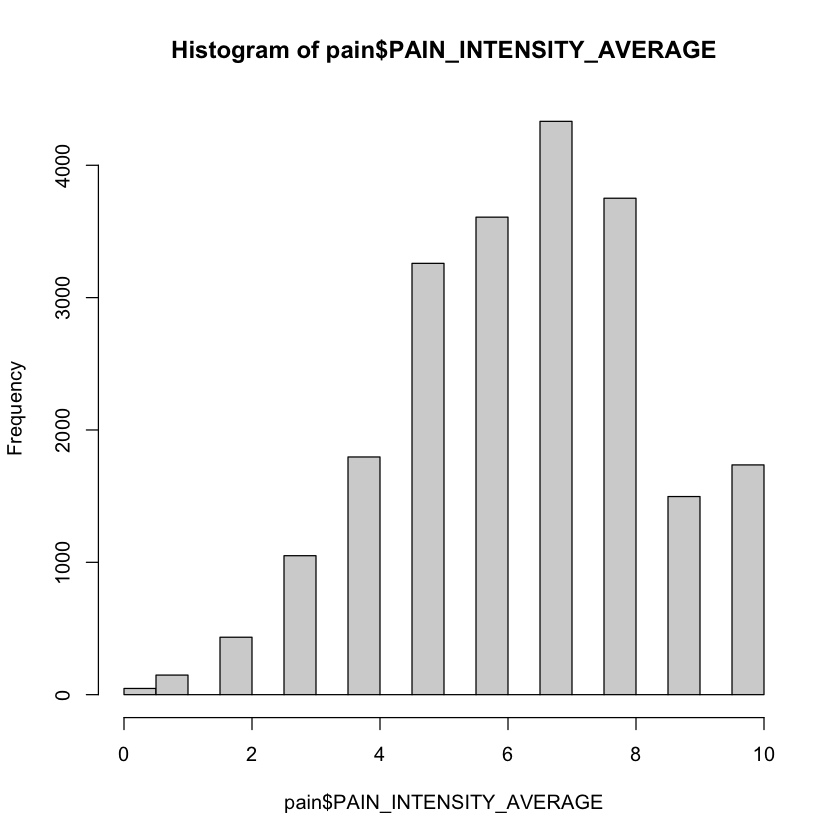

In [12]:
hist(pain$PAIN_INTENSITY_AVERAGE)

### Practice Question

Summarize the `PROMIS_SLEEP_DISTURB_V1_0` column both numerically and visually. Your results should look like this:

<img src="images/3-practicequestion1answer.png" alt= “” width="300pt" align="center">

In [13]:
# Insert your solution here:

We can also use the `summary()` function for categorical variables. In this case, R will find the counts for each level. 

In [14]:
summary(pain$PAT_SEX)

   Length     Class      Mode 
    21659 character character 

For categorical columns, it is also useful to use the `table()` function, which returns the counts for each possible value, instead of the `summary()` function. By default, `table()` ignores NA values. However, we can set `useNA="always"` if we also want to display the number of NA values in the table output. Additionally, we can use the `prop.table()` function to convert the counts to proportions. Below, we can see that the column `PAT_SEX` column, which corresponds to the reported patient sex, has a single missing value, and we can also see that around 60% of patients are female.

In [15]:
table(pain$PAT_SEX, useNA="always")


female   male   <NA> 
 13102   8556      1 

In [16]:
prop.table(table(pain$PAT_SEX))


   female      male 
0.6049497 0.3950503 

Note that this column is not actually a factor column yet, which we can check using the `is.factor()` function. We can convert it to one using `as.factor()`. 

In [17]:
is.factor(pain$PAT_SEX)

[1] FALSE

In [18]:
pain$PAT_SEX <- as.factor(pain$PAT_SEX)
is.factor(pain$PAT_SEX)

[1] TRUE

### Other Summary Functions

Sometimes we want to summarize information across multiple columns or rows. We can use the `rowSums()` and `colSums()` functions to sum over the rows or columns of a matrix or data frame. We first subset the data to the body pain map regions. In the first line of code, I select the column names pertaining to these columns. This allows me to select those columns in the second line of code and store this subset of the data as a new data frame called `pain_body_map`. 

In [19]:
body_map_cols <- names(pain)[2:75]
pain_body_map <- pain[, body_map_cols]
head(pain_body_map)

X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,⋯,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,0,0,0,0,⋯,0,0,1,1,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,1,0,0,0,0,1,0,0,0,1
0,0,0,0,0,0,0,0,0,1,⋯,0,0,1,0,1,0,1,0,1,0


I now compute the row sums and column sums on this subset of data. The row sum for each patient is the total number of body parts in which they experience pain, whereas the column sum for each pain region is the total number of patients who experience pain in that area. The histogram below shows that most people select a low number of total regions.

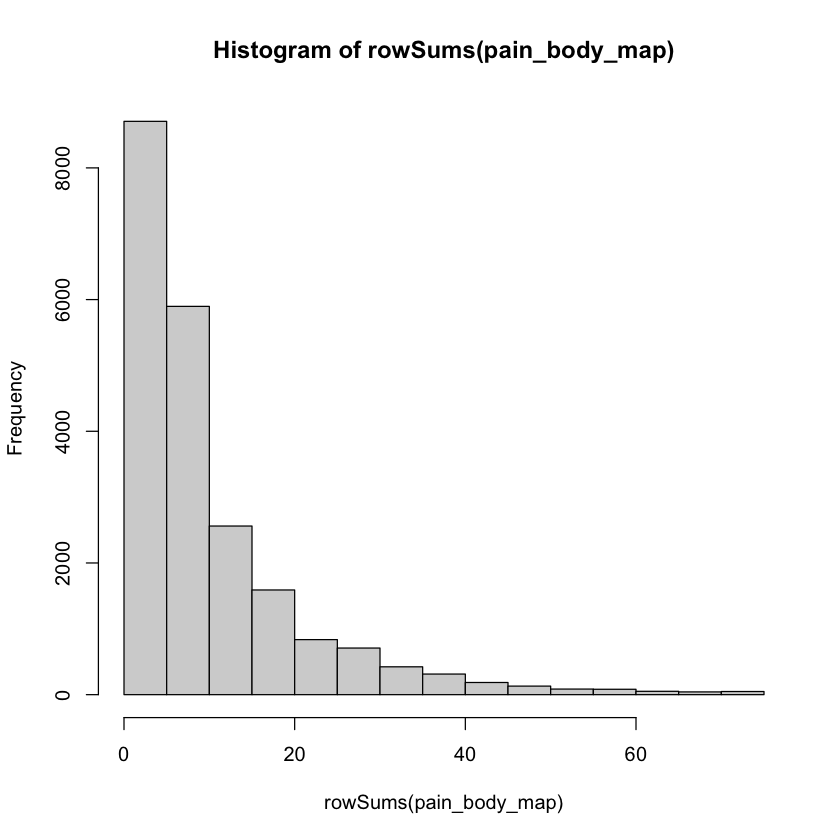

In [20]:
hist(rowSums(pain_body_map))

We can also see that some body parts are more often selected than others. We create a vector called `perc_patients` below by finding the number of patients who selected each region divided by the total number of patients. The histogram shows that some body regions are selected by over 50% of patients!

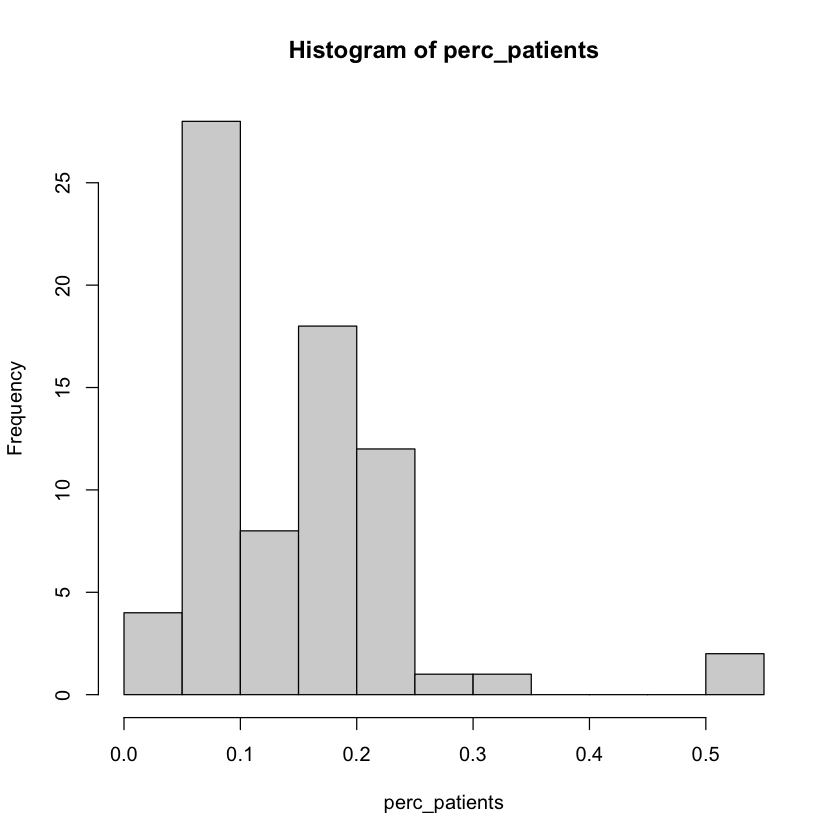

In [21]:
perc_patients <- colSums(pain_body_map, na.rm=TRUE)/nrow(pain_body_map)
hist(perc_patients)

We use the `which.max()` function to see that the 55th region `X219` is selected the most number of times. This corresponds to lower back pain.

In [22]:
which.max(perc_patients)

X219 
  55

Another pair of useful functions are `pmin()` and `pmax()`. These functions take at least two vectors and find the pairwise minimum of maximum across those vectors, as shown below. For example, suppose you had two vectors, 

In [23]:
v1 = c(5, 9, 12)
v2 = c(2, 18, 4)
pmax(v1, v2)  

[1]  5 18 12

Looking back at the `pain` data, if we want to create a new column `lower_back_pain` that corresponds to whether someone selects *either* X218 or X219 we can use the `pmax()` function to find the maximum value between columns `X218` and `X219`. We can see that almost 60% of patients select at least one of these regions.

In [24]:
lower_back <- pmax(pain_body_map$X218, pain_body_map$X219)
prop.table(table(lower_back))

lower_back
        0         1 
0.4053929 0.5946071 

We might want to store the total number of pain regions and our indicator of whether or not a patient has lower back pain as new columns. We use our code above to create new columns in the pain data using the `$` operator. To be consistent with the column naming in the data, we use all upper case for our column names. The `dim()` function shows that our data has grown by two columns, as expected. 

In [25]:
pain$NUM_REGIONS <- rowSums(pain_body_map)
pain$LOWER_BACK <- lower_back
dim(pain)

[1] 21659    94

Another useful function that allows us to perform computations over the rows or columns of a matrix or data frame is the `apply(X, MARGIN, FUN)` function, which takes in three arguments. The first agrument is a data frame or matrix `X`, the second argument `MARGIN` indicates whether to compute over the rows (`1`) or columns (`2`), and the last argument is the function `FUN` to apply across that margin. The first example below finds the maximum value for each row in the data frame `pain_body_map`. Taking the minimum value of the row maximum values shows that every patient selected at least one body map region. In the second example, we find the sum of the body pain regions over the columns, which is equivalent to the example using `colSums()` above. In this case, we added the `na.rm=TRUE` argument. The `apply()` function will pass additional arguments to the function `FUN`. 

In [26]:
any_selected <- apply(pain_body_map, 1, max)
min(any_selected, na.rm=TRUE)

[1] 1

In [27]:
perc_patients <- apply(pain_body_map, 2, sum, na.rm=TRUE)/nrow(pain_body_map)
summary(perc_patients)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.03227 0.06966 0.13620 0.14375 0.18125 0.54190 

### Practice Question

Find the sum of each of the PROMIS measures across all patients using `apply()` and then using `colSums()`. Verify that these two methods return the same result, which is given below:

<img src="images/3-practicequestion2answer.png" alt= “” width="600pt" align="center">

In [28]:
# Insert your solution here:

### Missing, Infinite, and NaN Values

As we saw above, this data contains some missing values, which are represented as `NA` in R. R treats these values as if they were unknown, which is why we have to add the `na.rm=TRUE` argument to functions like `sum()` and `max()`. In the example below, we can see that R figures out that 1 plus an unknown number is also unknown!

In [29]:
NA+1

[1] NA

We can determine whether a value is missing using the function `is.na()`. This function returns `TRUE` if the value is NA and `FALSE` otherwise. We can then sum up these values for a single column, since each `TRUE` value corresponds to a value of 1 and each `FALSE` corresponds to a value of 0. Below we can see that there is a single NA value for the column `PATIENT_NUM`, which is the patient ID number.

In [30]:
sum(is.na(pain$PATIENT_NUM))

[1] 1

If we want to calculate the sum of NA values for each column instead of just a single column, we can use the `apply` function. Since we want to apply this computation over the columns, the second argument has value 2. Recall that the last argument is the function we want to call for each column. In this case, we want to apply the combination of the `sum()` and `is.na()` function. To do so, we have to specify this function ourselves. This is called an **anonymous function** since it doesn't have a name. 

In [31]:
num_missing_col <- apply(pain, 2, function(x) sum(is.na(x)))
min(num_missing_col)

[1] 1

Interestingly, we can see that there is at least one missing value in each column. It might be the case that there is a row with all NA values. Let's apply the same function by row. Taking the maximum, we can see that row 11749 has all NA values.

In [32]:
num_missing_row <- apply(pain, 1, function(x) sum(is.na(x)))
max(num_missing_row)
which.max(num_missing_row)

[1] 94

[1] 11749

We remove that row and then find the percentage of missing values by column. We can see that the column with the highest percentage of missing values is the pain intensity at follow-up. In fact, only 33% of patients have a recorded follow-up visit. 

In [33]:
pain <- pain[-11749,]
num_missing_col <- apply(pain, 2, function(x) sum(is.na(x))/nrow(pain))
num_missing_col

PATIENT_NUM                             X101 
                     0.000000000                      0.000000000 
                            X102                             X103 
                     0.000000000                      0.000000000 
                            X104                             X105 
                     0.000000000                      0.000000000 
                            X106                             X107 
                     0.000000000                      0.000000000 
                            X108                             X109 
                     0.000000000                      0.000000000 
                            X110                             X111 
                     0.000000000                      0.000000000 
                            X112                             X113 
                     0.000000000                      0.000000000 
                            X114                             X115 
                     0.000000000                      0.000000000 
                            X116                             X117 
                     0.000000000                      0.000000000 
                            X118                             X119 
                     0.000000000                      0.000000000 
                            X120                             X121 
                     0.000000000                      0.000000000 
                            X122                             X123 
                     0.000000000                      0.000000000 
                            X124                             X125 
                     0.000000000                      0.000000000 
                            X126                             X127 
                     0.000000000                      0.000000000 
                            X128                             X129 
                     0.000000000                      0.000000000 
                            X130                             X131 
                     0.000000000                      0.000000000 
                            X132                             X133 
                     0.000000000                      0.000000000 
                            X134                             X135 
                     0.000000000                      0.000000000 
                            X136                             X201 
                     0.000000000                      0.000000000 
                            X202                             X203 
                     0.000000000                      0.000000000 
                            X204                             X205 
                     0.000000000                      0.000000000 
                            X206                             X207 
                     0.000000000                      0.000000000 
                            X208                             X209 
                     0.000000000                      0.000000000 
                            X210                             X211 
                     0.000000000                      0.000000000 
                            X212                             X213 
                     0.000000000                      0.000000000 
                            X214                             X215 
                     0.000000000                      0.000000000 
                            X216                             X217 
                     0.000000000                      0.000000000 
                            X218                             X219 
                     0.000000000                      0.000000000 
                            X220                             X221 
                     0.000000000                      0.000000000 
                            X222                             X223 
                     0.000000000                      0.000000000 
 

We will create two new columns: first, we create a column for the change in pain at follow-up, and second, we create a column which is the percent change in pain at follow-up. 

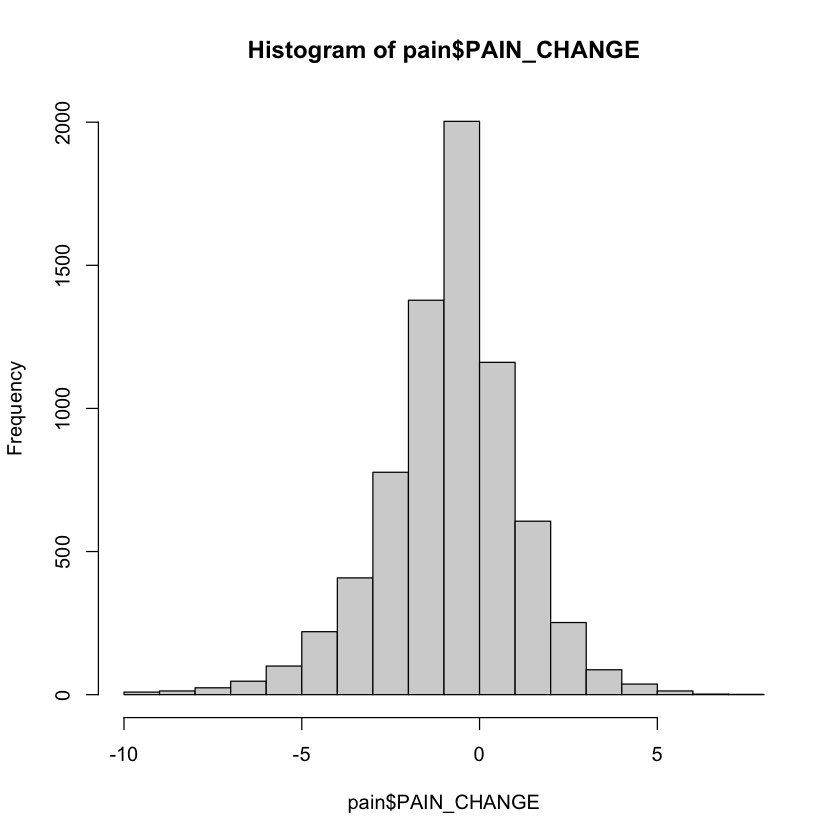

In [34]:
pain$PAIN_CHANGE <- pain$PAIN_INTENSITY_AVERAGE.FOLLOW_UP - pain$PAIN_INTENSITY_AVERAGE
hist(pain$PAIN_CHANGE)

In [35]:
pain$PERC_PAIN_CHANGE <- pain$PAIN_CHANGE/pain$PAIN_INTENSITY_AVERAGE
summary(pain$PERC_PAIN_CHANGE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -1.000  -0.200   0.000     Inf   0.143     Inf   14520 

In the summary of the percent change, we can see that the maximum value is `Inf`. This is R's representation of infinity. This occurred because some patients have an intial pain score of 0, which creates infinite values when we divide through by this value to find the percent change. We can test whether something is infinite using the `is.infinite()` or `is.finite()` functions. This shows that there were three patients with infinite values. The value `-Inf` is used to represent negative infinity.

In [36]:
sum(is.infinite(pain$PERC_PAIN_CHANGE))

[1] 3

Another special value in R is `NaN`, which stands for "Not a Number". For example, `0/0` will result in a NaN value. We can test for `NaN` values using the `is.nan()` function.

In [37]:
0/0

[1] NaN

Looking back at the missing values, there are two useful functions for selecting the complete cases in a data frame. The `na.omit()` function returns the data frame with incomplete cases removed, whereas `complete.cases()` returns TRUE/FALSE values for each row indicating whether each row is complete, which we can then use to select the rows with TRUE values. Below, we see both approaches select the same number of rows.

In [38]:
pain_sub1 <- na.omit(pain)
pain_sub2 <- pain[complete.cases(pain),]
dim(pain_sub1)
dim(pain_sub2)

[1] 2413   96

[1] 2413   96

## Using Logic to Subset, Summarize, and Transform

Above, we used TRUE/FALSE values to select rows in a data frame. The logic operators in R allow us to expand on this capability to write more complex logic. The operators are given below. 

* `<` less than
* `<=` less than or equal to 
* `>` greater than
*  `>=` greater than or equal to 
* `==` equal to
* `!=` not equal to 
* `a %in% b` a's value is in a vector of values b

The first six operators are a direct comparison between two values and are demonstrated below. 

In [39]:
2 < 2
2 <= 2
3 > 2
3 >= 2
"A" == "B"
"A" != "B"

[1] FALSE

[1] TRUE

[1] TRUE

[1] TRUE

[1] FALSE

[1] TRUE

The operators assume there is a natural ordering or comparison between values. For example, for strings the ordering is alphabetical and for logical operators we use their numeric interpretation (TRUE = 1, FALSE = 0).

In [40]:
"A" < "B"
TRUE < FALSE

[1] TRUE

[1] FALSE

The `%in%` operator is slightly different. This operator checks whether a value is in a set of possible values. Below, we can check whether values are in the set `c(4,1,2)`.

In [41]:
1 %in% c(4,1,2)
c(0,1,5) %in% c(4,1,2)

[1] TRUE

[1] FALSE  TRUE FALSE

Additionally, we can use the following operators, which allow us to negate or combine logical operators. 

* `!x` - the **NOT** operator `!` reverses TRUE/FALSE values 
* `x | y` - the **OR** operator `|` checks whether *either* x or y is equal to TRUE
* `x & y` - the **AND** operator `&` checks whether *both* x and y are equal to TRUE
* `xor(x,y)` - the **xor** function checks whether exactly one of x or y is equal to TRUE (called exclusive or)
* `any(x)` - the **any** function checks whether any value in x is TRUE (equivalent to using an OR operator `|` between all values)
* `all(x)` - the **all** function checks whether all values in x are TRUE (equivalent to using an AND operator `&` between all values)

Some simple examples for each are given below. 

In [42]:
!(2 < 3)
("Alice" < "Bob") | ("Alice" < "Aaron")
("Alice" < "Bob") & ("Alice" < "Aaron")
xor(TRUE, FALSE)
any(c(FALSE, TRUE, TRUE))
all(c(FALSE, TRUE, TRUE))

[1] FALSE

[1] TRUE

[1] FALSE

[1] TRUE

[1] TRUE

[1] FALSE

Let's demonstrate these operators on the pain data. We first update the Medicaid column by making the character values more informative. The logic on the left hand side selects those that do or do not have Medicaid and then assigns those values to the new ones. 

In [43]:
pain$MEDICAID_BIN[pain$MEDICAID_BIN == "no"] <- "No Medicaid"
pain$MEDICAID_BIN[pain$MEDICAID_BIN == "yes"] <- "Medicaid"
table(pain$MEDICAID_BIN)


   Medicaid No Medicaid 
       4601       16757 

Additionally, we could subset the data to only those who have follow-up. The not operator `!` will reverse the TRUE/FALSE values returned from the `is.na()` function. Therefore, the new value will be TRUE if the follow-up value is *not* NA.

In [44]:
pain_follow_up <- pain[!is.na(pain$PAIN_INTENSITY_AVERAGE.FOLLOW_UP),]

Earlier, we created a column indicating whether or not a patient has lower back pain. We now use the `any()` function to check whether a patient has general back pain. If at least one of these values is equal to 1, then the function will return TRUE. If we had used the `all()` function instead, this would check whether all values are equal to 1, indicating that a patient has pain on their whole back. 

In [45]:
pain$BACK <- any(pain$X208==1, pain$X209==1, pain$X212==1, pain$X213==1, 
                 pain$X218==1, pain$X219==1)

### Practice Question

Subset the `pain` data to those who have follow-up and have an initial average pain intensity of 5 or above. Name this subset of the data `pain_subset`. Print the head of this data. The first 6 patient IDs in this new dataset should be 13118, 21384, 1827, 11309, 11093, and 14667.

In [46]:
# Insert your solution here:

Lastly, we look at the column for patient race `PAT_RACE`. The `table()` function shows that most patients are `WHITE` or `BLACK`. Given how few observations are in the other categories, we may want to combine some of these levels into one. 

In [47]:
table(pain$PAT_RACE)


         ALASKA NATIVE        AMERICAN INDIAN                  BLACK 
                     2                     58                   3229 
               CHINESE               DECLINED               FILIPINO 
                    21                    121                      6 
         GUAM/CHAMORRO               HAWAIIAN         INDIAN (ASIAN) 
                     1                      1                     49 
              JAPANESE                 KOREAN          NOT SPECIFIED 
                     9                     10                      4 
                 OTHER            OTHER ASIAN OTHER PACIFIC ISLANDER 
                     1                     47                     12 
            VIETNAMESE                  WHITE 
                     6                  17940 

Another way we could have found all possible values for this column is to use the `unique()` function. This function takes in a data frame or vector `x` and returns `x` with all duplicate rows or values removed. 

In [48]:
unique(pain$PAT_RACE)

[1] "WHITE"                  "BLACK"                  "DECLINED"              
 [4] "AMERICAN INDIAN"        "INDIAN (ASIAN)"         "ALASKA NATIVE"         
 [7] NA                       "FILIPINO"               "JAPANESE"              
[10] "VIETNAMESE"             "KOREAN"                 "CHINESE"               
[13] "OTHER ASIAN"            "NOT SPECIFIED"          "HAWAIIAN"              
[16] "OTHER PACIFIC ISLANDER" "OTHER"                  "GUAM/CHAMORRO"

To combine some of these levels, we can use the `%in%` operator. We first create an Asian, Asian American, or Pacific Islander race category and then create an American Indian or Alaska Native category.

In [49]:
aapi_values <- c("CHINESE", "HAWAIIAN", "INDIAN (ASIAN)", "FILIPINO", "VIETNAMESE", 
                 "JAPANESE", "KOREAN", "GUAM/CHAMORRO", "OTHER ASIAN", 
                 "OTHER PACIFIC ISLANDER")
pain$PAT_RACE[pain$PAT_RACE %in% aapi_values] <- "AAPI"
pain$PAT_RACE[pain$PAT_RACE %in% c("ALASKA NATIVE", "AMERICAN INDIAN")] <- "AI/AN"
table(pain$PAT_RACE)


         AAPI         AI/AN         BLACK      DECLINED NOT SPECIFIED 
          162            60          3229           121             4 
        OTHER         WHITE 
            1         17940 

### Other Selection Functions

Above, we selected rows using TRUE/FALSE boolean values. Instead, we could have also used the `which()` function. This function takes TRUE/FALSE values and returns the index values for all the TRUE values. We use this to treat those with race given as `DECLINED` as not specified.

In [50]:
pain$PAT_RACE[which(pain$PAT_RACE == "DECLINED")] <- "NOT SPECIFIED"

Another selection function is the `subset()` function. This function takes in two arguments. The first is the vector, matrix, or data frame to select from and the second is a vector of TRUE/FALSE values to use for row selection. We use this to find the observation with race marked as `OTHER`. We then update this race to also be marked as not specified.

In [51]:
subset(pain, pain$PAT_RACE == "OTHER")

PATIENT_NUM,X101,X102,X103,X104,X105,X106,X107,X108,X109,⋯,PAIN_INTENSITY_AVERAGE.FOLLOW_UP,PAT_SEX,PAT_RACE,CCI_BIN,MEDICAID_BIN,NUM_REGIONS,LOWER_BACK,PAIN_CHANGE,PERC_PAIN_CHANGE,BACK
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
3588,1,1,1,0,1,1,1,0,0,⋯,NA,female,OTHER,No comorbidity,Medicaid,34,1,NA,NA,TRUE


In [52]:
pain$PAT_RACE[pain$PATIENT_NUM==3588] <- "NOT SPECIFIED"
table(pain$PAT_RACE)


         AAPI         AI/AN         BLACK NOT SPECIFIED         WHITE 
          162            60          3229           126         17940 

## Recap Video

In the video below, we reference the population mean and standard deviations for the instrument variables in the data. Use the help operator (`?pain`) to refresh your memory about these variables. 

<div class="video-container">
    <iframe width="700" height="500" src="https://www.youtube.com/embed/EU0UJN68OWQ" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>
</div>


## Exercises

For these exercises, we will again be using the `pain` data from the `RforHDSdata` package.


1. Print summary statistics for the `PROMIS_PHYSICAL_FUNTION` and `PROMIS_ANXIETY` columns in this dataset. Read the data documentation for these two columns, which both have range 0 to 100, and then comment on the distributions of these columns. 

In [53]:
summary(pain$PROMIS_PHYSICAL_FUNCTION)
summary(pain$PROMIS_ANXIETY)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.40   30.60   35.39   35.27   39.37   73.33 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  32.87   49.27   56.49   56.28   63.35   84.90      87 

2. Create frequency tables for the values of `PAT_SEX` and `PAT_RACE` and summarize what these tables tell you about the distributions of these demographic characteristics.

In [54]:
table(pain$PAT_SEX)
table(pain$PAT_RACE)


female   male 
 13102   8556 


         AAPI         AI/AN         BLACK NOT SPECIFIED         WHITE 
          162            60          3229           126         17940 

3. Create a new data frame called `pain.new` that doesn't contain patients with NA values for both `GH_MENTAL_SCORE` and `GH_PHYSICAL_SCORE`, which are the PROMIS global mental and physical scores, respectively. 

In [55]:
pain.new <- pain[!is.na(pain$GH_MENTAL_SCORE) & !is.na(pain$GH_PHYSICAL_SCORE),]

4. Create a vector of the total number of patients who reported pain in each of the pain regions. Then, find the minimum, median, mean, maximum, standard deviation, and variance of this vector.

In [56]:
colsums <- colSums(pain[,c(2:75)], na.rm = TRUE)

colsum_summary <- data.frame(Variable = c("Sum of Columns"),
                             Min =  min(colsums),
                             Median = median(colsums),
                             Mean  = mean(colsums),
                             Max = max(colsums),
                             SD = sd(colsums),
                             Var = var(colsums))
colsum_summary

Variable,Min,Median,Mean,Max,SD,Var
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sum of Columns,699,2950,3113.541,11737,2062.778,4255051


5. Calculate the median and interquartile range of the distribution of the total number of painful **leg** regions selected for each patient. Then, write a few sentences explaining anything interesting you observe about this distribution in the context of this dataset. 

In [57]:
leg_cols <- which(colnames(pain) %in% c("X126", "X127", "X228", "X229", 
                            "X129", "X130", "X231", "X232", 
                            "X131", "X132", "X233", "X234",
                            "X133", "X134", "X235", "X236"))
rowsum.thigh <- rowSums(pain[,leg_cols], na.rm = TRUE)
median(rowsum.thigh)
IQR(rowsum.thigh)

[1] 2

[1] 4

6. Look at the distribution of average pain intensity between patients with only one pain region selected vs. those with more than one region selected. What do you notice? 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    4.00    6.00    5.92    8.00   10.00 

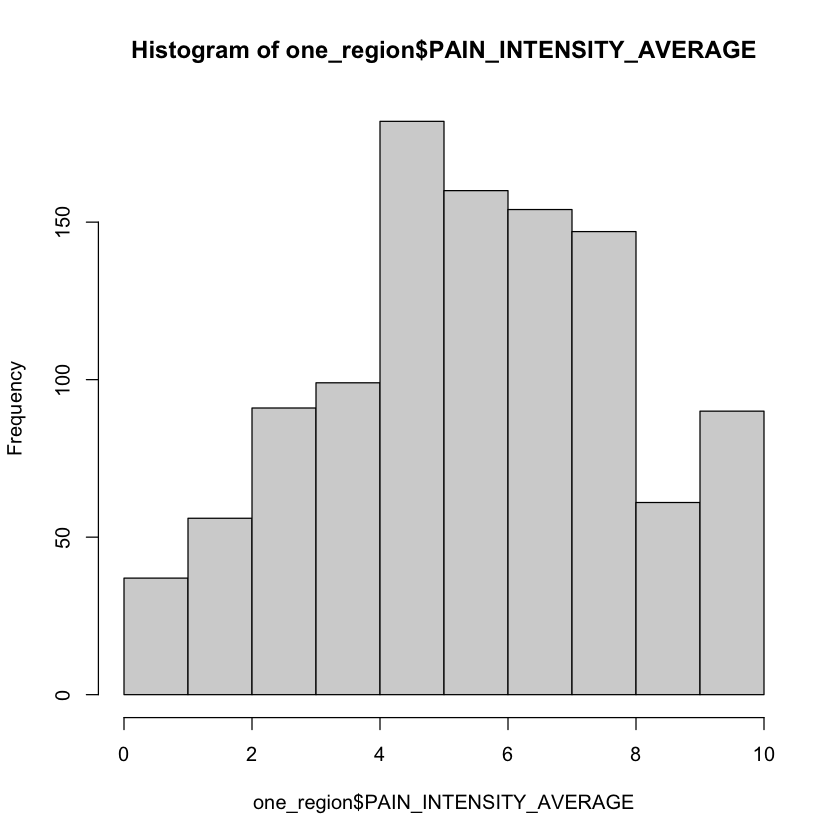

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   5.000   7.000   6.515   8.000  10.000 

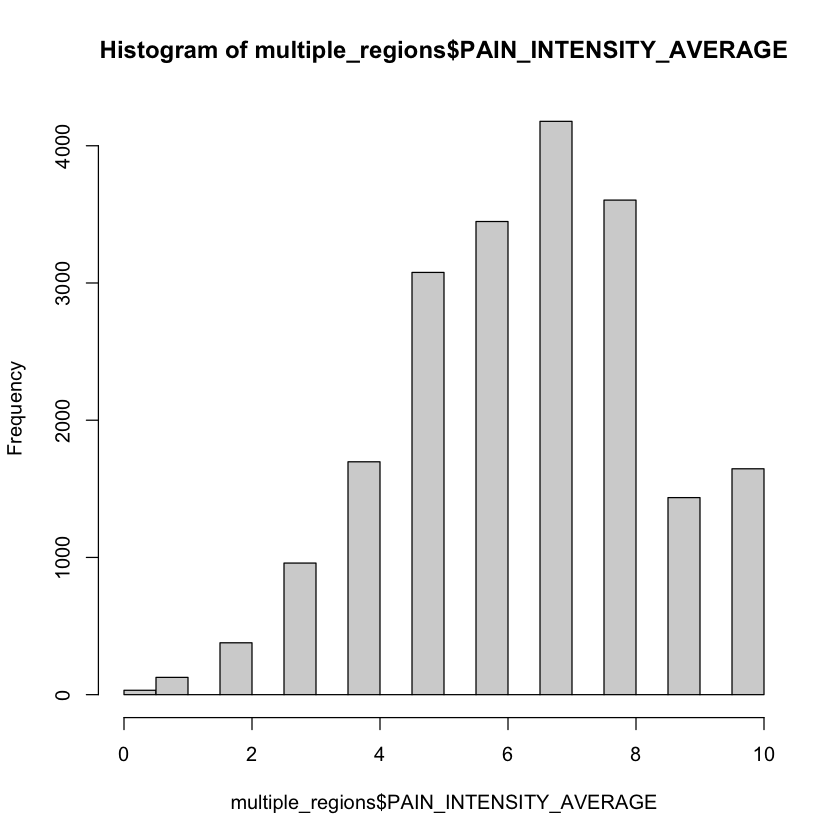

In [58]:
one_region <- subset(pain, NUM_REGIONS == 1)
multiple_regions <- subset(pain, NUM_REGIONS > 1)
hist(one_region$PAIN_INTENSITY_AVERAGE)
summary(one_region$PAIN_INTENSITY_AVERAGE)
hist(multiple_regions$PAIN_INTENSITY_AVERAGE)
summary(multiple_regions$PAIN_INTENSITY_AVERAGE)

7. Create a histogram to plot the distribution of the `PAIN_INTENSITY_AVERAGE.FOLLOW_UP` column. Then, create a table summarizing how many patients had missing values in this column. Finally, compare the distributions of the other columns between those with and without missing follow up. What do you notice? 


    Missing Not Missing 
      14520        7138 

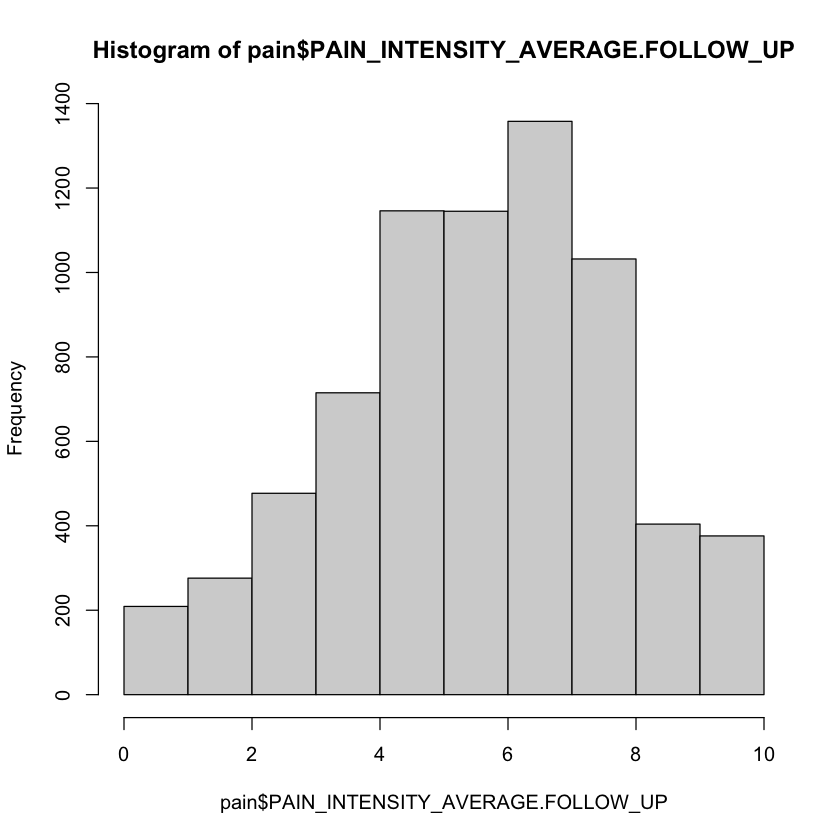

In [59]:
hist(pain$PAIN_INTENSITY_AVERAGE.FOLLOW_UP)

pain$missing_follow_up <- is.na(pain$PAIN_INTENSITY_AVERAGE.FOLLOW_UP)
pain$missing_follow_up[pain$missing_follow_up == "FALSE"] <- "Not Missing"
pain$missing_follow_up[pain$missing_follow_up == "TRUE"] <- "Missing"
table(pain$missing_follow_up)